In [6]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stat
from IPython.core.pylabtools import figsize

In [7]:
tickers = ['TATAELXSI.NS','INFY.NS', 'AMARAJABAT.NS', 'MARICO.NS', 'RELIANCE.NS', 'TCS.NS']
weights = np.array([.16, .17, .16, .17, .17,.17])
initial_investment = 1000000 # 1 mn USD
data = pdr.get_data_yahoo(tickers, start="2017-01-01", end=dt.date.today())['Close']
returns = data.pct_change()
returns.tail()

Symbols,AMARAJABAT.NS,INFY.NS,MARICO.NS,RELIANCE.NS,TATAELXSI.NS,TCS.NS
Date,,,,,,
2020-12-11,-0.008285,-0.003896,0.026723,-0.000598,-0.002825,-0.000251
2020-12-14,0.002035,0.001161,-0.002048,-0.007229,-0.003549,0.005065
2020-12-15,0.008711,-0.008544,-0.013523,-0.008512,0.022654,-0.012921
2020-12-16,0.015205,0.009614,0.011383,0.001114,0.007822,0.019065
2020-12-17,-0.010124,0.000257,-0.007382,0.004579,-0.010429,-0.001244


In [8]:
cov_matrix = returns.cov()
cov_matrix

Symbols,AMARAJABAT.NS,INFY.NS,MARICO.NS,RELIANCE.NS,TATAELXSI.NS,TCS.NS
Symbols,,,,,,
AMARAJABAT.NS,0.000392,0.000067,0.000079,0.000143,0.000145,0.000058
INFY.NS,0.000067,0.000347,0.000052,0.000096,0.000123,0.000171
MARICO.NS,0.000079,0.000052,0.000241,0.000085,0.000073,0.000031
RELIANCE.NS,0.000143,0.000096,0.000085,0.000426,0.000123,0.000089
TATAELXSI.NS,0.000145,0.000123,0.000073,0.000123,0.000533,0.000117
TCS.NS,0.000058,0.000171,0.000031,0.000089,0.000117,0.000283


In [9]:
avg_rets = returns.mean() #mean per equity
port_mean = avg_rets.dot(weights) # dot product to find mean of portfolio
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
print (port_stdev)
mean_investment = (1 + port_mean) * initial_investment
stdev_investment = initial_investment * port_stdev

0.011974092199629471


In [10]:
cutoff = norm.ppf(0.05, mean_investment, stdev_investment) #assuming confidence level = 95%
# ppf is the inverse of CDF to map x for given f(x); here Z-value which we refer from log table book
var = initial_investment - cutoff
var

18751.625967018656

0 day VaR >> @ Confidence level 95% >> 0.0
1 day VaR >> @ Confidence level 95% >> 18751.63
2 day VaR >> @ Confidence level 95% >> 26518.8
3 day VaR >> @ Confidence level 95% >> 32478.77
4 day VaR >> @ Confidence level 95% >> 37503.25
5 day VaR >> @ Confidence level 95% >> 41929.91
6 day VaR >> @ Confidence level 95% >> 45931.92
7 day VaR >> @ Confidence level 95% >> 49612.14
8 day VaR >> @ Confidence level 95% >> 53037.61
9 day VaR >> @ Confidence level 95% >> 56254.88
10 day VaR >> @ Confidence level 95% >> 59297.85
11 day VaR >> @ Confidence level 95% >> 62192.11
12 day VaR >> @ Confidence level 95% >> 64957.54
13 day VaR >> @ Confidence level 95% >> 67609.95
14 day VaR >> @ Confidence level 95% >> 70162.16
15 day VaR >> @ Confidence level 95% >> 72624.74
16 day VaR >> @ Confidence level 95% >> 75006.5
17 day VaR >> @ Confidence level 95% >> 77314.93
18 day VaR >> @ Confidence level 95% >> 79556.41
19 day VaR >> @ Confidence level 95% >> 81736.44
20 day VaR >> @ Confidence level 95% 

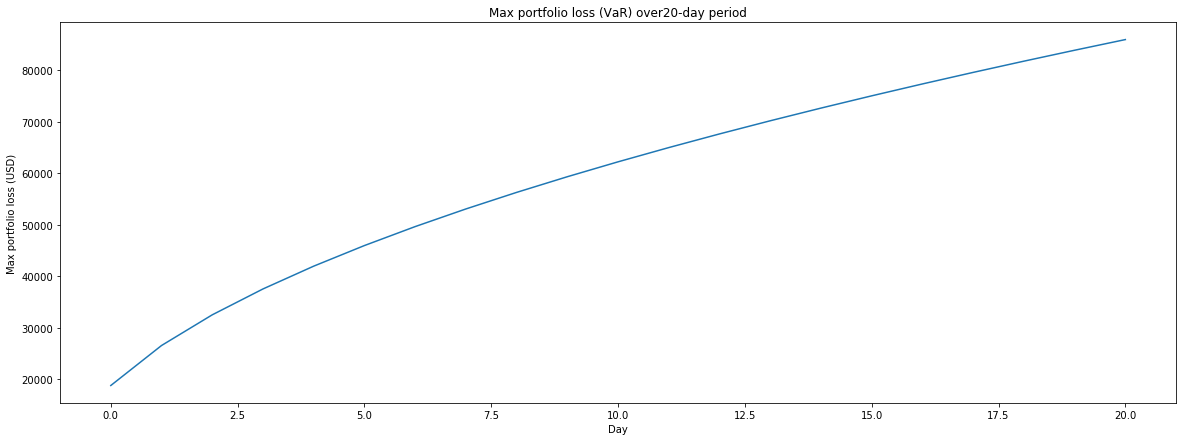

In [11]:
var_array = []
days = [20] #since it is 0.05 VaR
for y in days:
    var_array = []
    for x in range(y + 1):
        var_array.append(np.round(var * np.sqrt(x + 1), 5))
        print(str(x) + " day VaR >> @ Confidence level 95% >> " + str(np.round(var * np.sqrt(x),2)))

    figsize(20, 7)
    plt.xlabel("Day")
    plt.ylabel("Max portfolio loss (USD)")
    plt.title("Max portfolio loss (VaR) over" + str(y) + "-day period")
    plt.show(plt.plot(var_array))

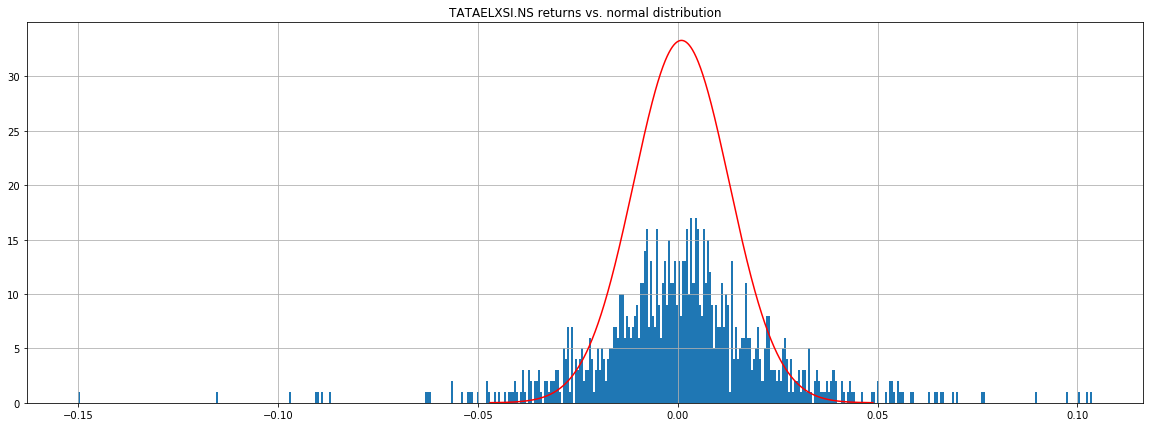

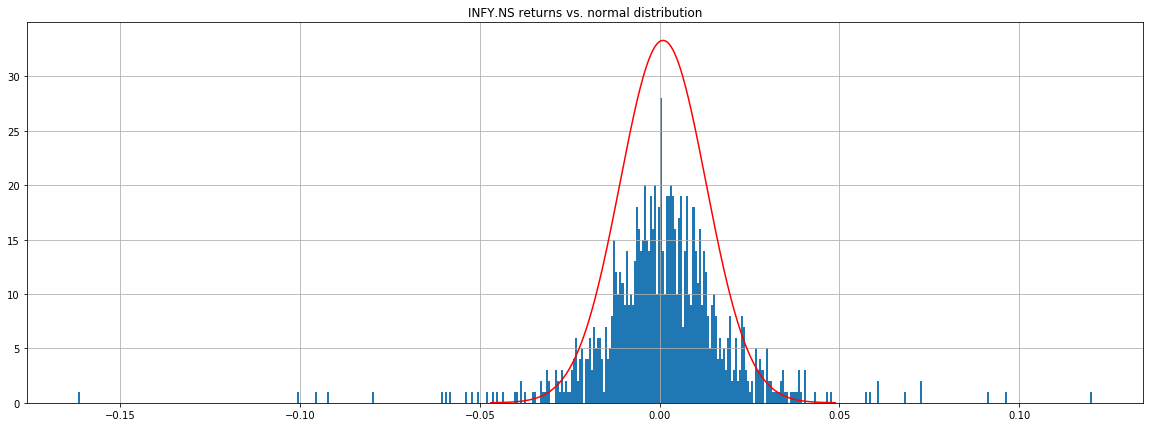

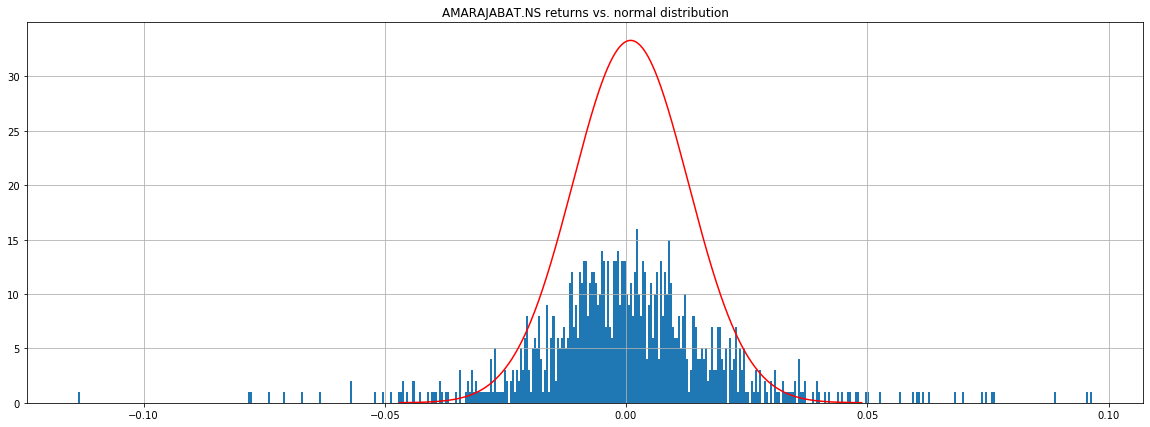

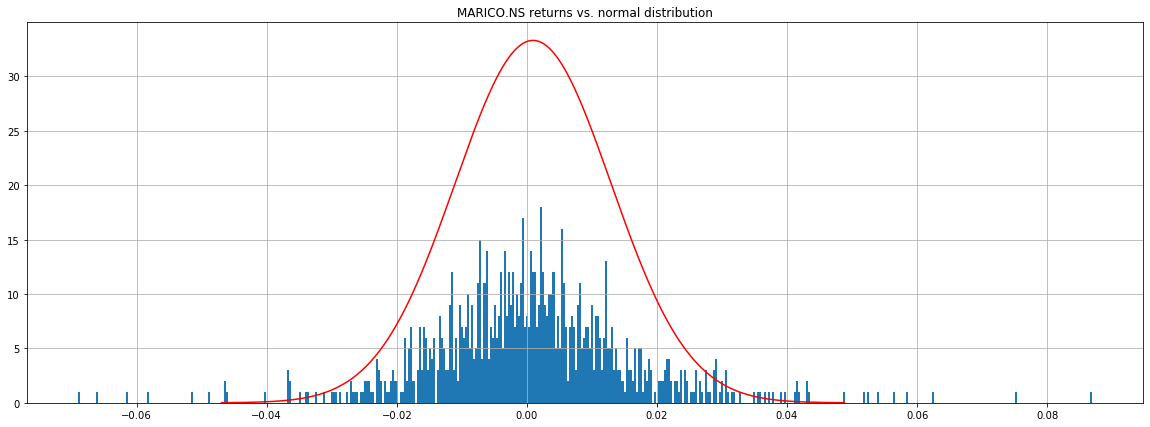

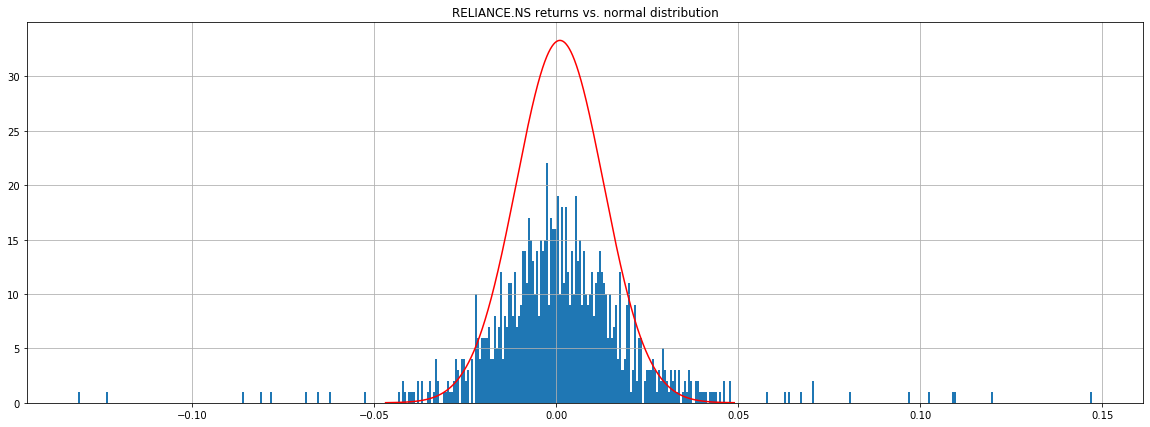

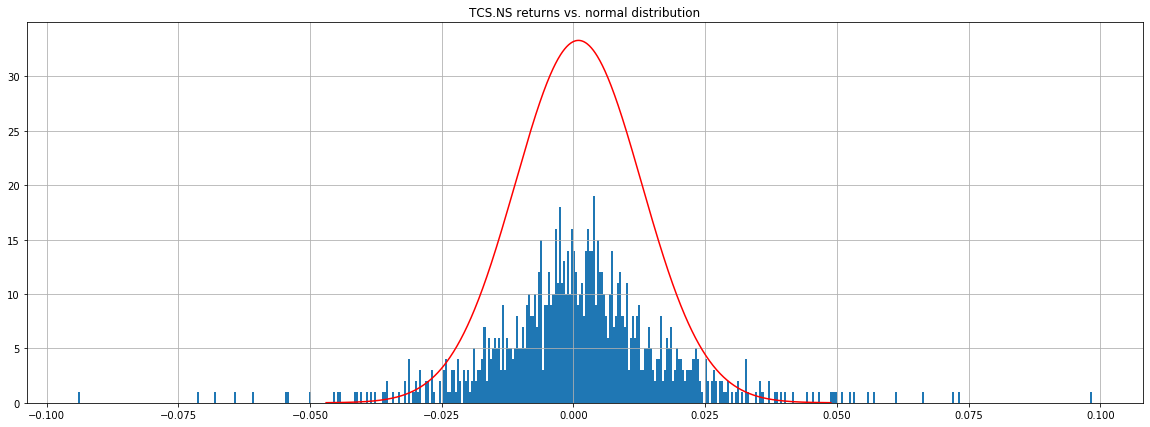

In [12]:
for i in tickers:
    returns[i].hist(bins = 500) # to capture ALL events possible and no chance for any left tail events ;)
    x = np.linspace(port_mean - 4 * port_stdev, port_mean + 4 * port_stdev, 1000) # the normal 3 SD's apart for fat-tailedness
    figsize(20, 7)
    plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
    plt.title(i + " returns vs. normal distribution")
    plt.show()